# LSTM Train - Trafik - PCA

In [2]:
import pandas as pd
import sys
from pathlib import Path
sys.path.append('../..')
from src import config
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split

In [3]:
DATASET_PATH = config.DATA_INTERIM.joinpath('data.parquet')    
df = pd.read_parquet(DATASET_PATH)
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1
data_array = df.values

Epoch 1/500  Train Loss: 1434387.5625  Val Loss: 1549385.2500  Val MSE: 1801.6109  Val R2: 0.6789
Epoch 2/500  Train Loss: 1492604.8125  Val Loss: 1549354.8750  Val MSE: 1801.5753  Val R2: 0.6789
Epoch 3/500  Train Loss: 1527336.1875  Val Loss: 1549321.7500  Val MSE: 1801.5370  Val R2: 0.6789
Epoch 4/500  Train Loss: 1495842.9375  Val Loss: 1549286.7500  Val MSE: 1801.4963  Val R2: 0.6789
Epoch 5/500  Train Loss: 1479551.0625  Val Loss: 1549250.8750  Val MSE: 1801.4544  Val R2: 0.6789
Epoch 6/500  Train Loss: 1532022.8125  Val Loss: 1549215.2500  Val MSE: 1801.4131  Val R2: 0.6789
Epoch 7/500  Train Loss: 1514684.0000  Val Loss: 1549179.5000  Val MSE: 1801.3717  Val R2: 0.6789
Epoch 8/500  Train Loss: 1509822.1875  Val Loss: 1549146.1250  Val MSE: 1801.3327  Val R2: 0.6789
Epoch 9/500  Train Loss: 1456842.5000  Val Loss: 1549112.0000  Val MSE: 1801.2931  Val R2: 0.6789
Epoch 10/500  Train Loss: 1447099.2500  Val Loss: 1549076.6250  Val MSE: 1801.2517  Val R2: 0.6789
Epoch 11/500  Train

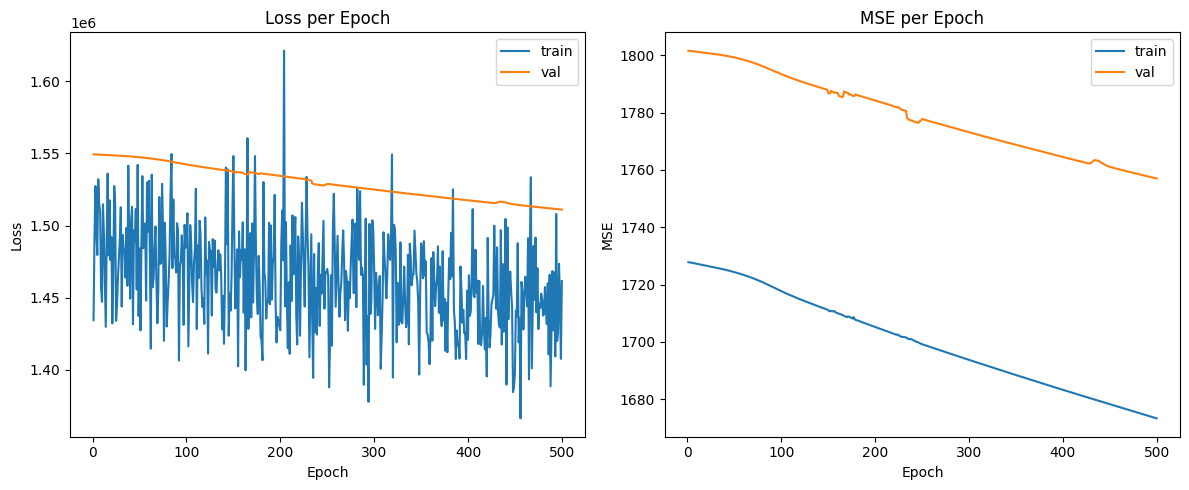

== Final Metrics ==
mse: 1757.0429187529205
mae: 27.881547090431436
r2: 0.686828174377442


In [5]:
PCA_COMPONENTS = 10
dataset = TrafficDataset(data_array, X_STEP, Y_STEP, pca_components=PCA_COMPONENTS)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds, batch_size=50, shuffle=True, num_workers=8)
val_loader = DataLoader(val_ds, batch_size=50, num_workers=8)
predictor = TrafficPredictor('lstm', dataset.sensors, X_STEP, Y_STEP, pca_model=dataset.pca if True else None)
predictor.train(train_loader, val_loader, epochs=500, save_path=config.PROJECT_ROOT.joinpath('models/lstm_trafik_pca.pt'), save_optimizer=True)
predictor.show()